In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


In [2]:
df = pd.read_csv("../data/raw/demand_data.csv")
df['Date'] = pd.to_datetime(df['Date'])

# Aggregate weekly demand
weekly_demand = (
    df.groupby('Date')['Weekly_Sales']
    .sum()
    .reset_index()
)

weekly_demand.set_index('Date', inplace=True)
weekly_demand = weekly_demand.sort_index()

weekly_demand.head()


,Weekly_Sales
Date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78
2010-02-26,43968571.13
2010-03-05,46871470.30


In [3]:
train = weekly_demand.iloc[:-12]
test = weekly_demand.iloc[-12:]

print("Train size:", train.shape)
print("Test size:", test.shape)


Train size: (131, 1)
Test size: (12, 1)


In [4]:
model = ARIMA(train['Weekly_Sales'], order=(2, 1, 2))
model_fit = model.fit()

model_fit.summary()


/home/arya_stark/demand-forecasting-system/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/home/arya_stark/demand-forecasting-system/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/home/arya_stark/demand-forecasting-system/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2206.401
Date:                Mon, 29 Dec 2025   AIC                           4422.801
Time:                        01:24:01   BIC                           4437.139
Sample:                    02-05-2010   HQIC                          4428.627
                         - 08-03-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2809      0.285     -0.984      0.325      -0.840       0.278
ar.L2          0.4642      0.113      4.119      0.000       0.243       0.685
ma.L1         -0.2302      0.295     -0.781      0.435      -0.808       0.348
ma.L2         -0.7238      0.250     -2.899      0.004      -1.213      -0.234
sigma2      3.425e+13   4.05e-14   8.45e+26      0.000    3.42e+13    3.42e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.49   Jarque-Bera (JB):               341.45
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               1.51   Skew:                             1.02
Prob(H) (two-sided):                  0.18   Kurtosis:                        10.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.8e+41. Standard errors may be unstable.
"""

In [5]:
forecast = model_fit.forecast(steps=12)
forecast


2012-08-10    4.680277e+07
2012-08-17    4.752469e+07
2012-08-24    4.700480e+07
2012-08-31    4.748594e+07
2012-09-07    4.710945e+07
2012-09-14    4.743855e+07
2012-09-21    4.717134e+07
2012-09-28    4.739917e+07
2012-10-05    4.721114e+07
2012-10-12    4.736971e+07
2012-10-19    4.723788e+07
2012-10-26    4.734852e+07
Freq: W-FRI, Name: predicted_mean, dtype: float64

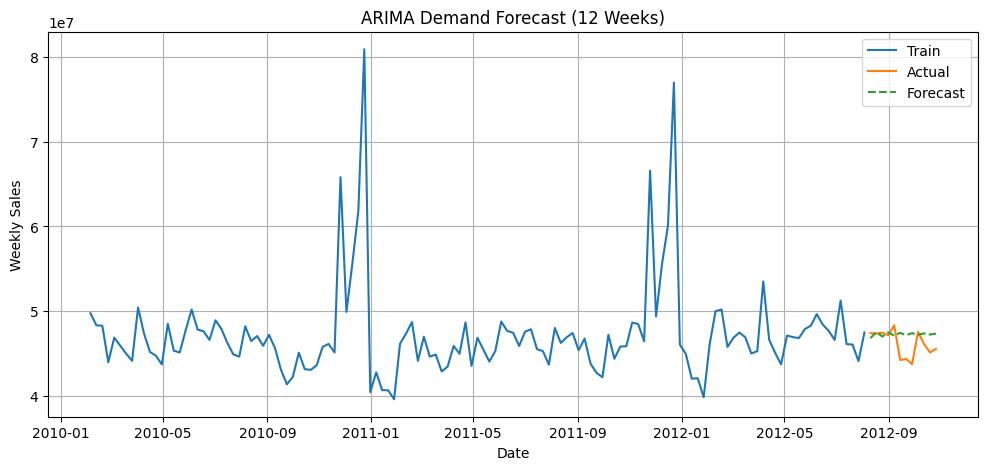

In [6]:
plt.figure(figsize=(12,5))
plt.plot(train.index, train['Weekly_Sales'], label='Train')
plt.plot(test.index, test['Weekly_Sales'], label='Actual')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')

plt.title("ARIMA Demand Forecast (12 Weeks)")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.grid(True)
plt.show()
